In [27]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
from nltk.stem import SnowballStemmer
import re
from nltk.corpus import stopwords

In [16]:
def Wiki_review_to_wordlist(raw_review, stemmer=False):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove non-letters
    #letters_only = re.sub("[^A-Za-z0-9]", " ", review_text) 
    letters_only = re.sub("[^\w\d]", " ", raw_review) 
    #
    # 2. Split into individual words
    #### Para este modelo W2V no modificamos las mayúsculas
    words = letters_only.split()
    #
    # 3. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("spanish"))                  
    # 
    # 4. Remove stop words and apply or not stemming
    if stemmer:
        meaningful_words = [stemmer.stem(w) for w in words if not w in stops]
    else:
        # "re.sub("^\d+$", "DIGITO", w) Change all numbers with the token “DIGITO”
        meaningful_words = [re.sub("^\d+$", "DIGITO", w) for w in words if not w in stops]
    #
    # 5. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( meaningful_words ))
    return meaningful_words

def Hufa_review_to_wordlist(raw_review, stemmer=False):
    # Function to convert a raw review to a string of words
    # The input is a single string (a raw movie review), and 
    # the output is a single string (a preprocessed movie review)
    #
    # 1. Remove accent marks
    review_text = ''.join((c for c in unicodedata.normalize('NFD',str(raw_review)) if unicodedata.category(c) != 'Mn'))
    #
    # 2. Remove non-letters
    #letters_only = re.sub("[^A-Za-z0-9]", " ", review_text) 
    letters_only = re.sub("[^\w\d]", " ", review_text) 
    #
    # 2. Convert to lower case, split into individual words
    words = letters_only.lower().split()                             
    #
    # 3. In Python, searching a set is much faster than searching
    #   a list, so convert the stop words to a set
    stops = set(stopwords.words("spanish"))                  
    # 
    # 4. Remove stop words and apply or not stemming
    if stemmer:
        meaningful_words = [stemmer.stem(w) for w in words if not w in stops]
    else:
        meaningful_words = [w for w in words if not w in stops]
    #
    # 5. Join the words back into one string separated by space, 
    # and return the result.
    #return( " ".join( meaningful_words ))
    return meaningful_words

def load_data(path):
    df = pd.read_csv(path, sep='\t', index_col=0)
    print("Loaded dataset:", path)
    return df

In [17]:
path_data_train = "./hufa_train_stem_skip/train"
path_data_test = "./hufa_test_stem_skip/test"
path_data_dev = "./hufa_dev_stem_skip/dev"

stemmer = SnowballStemmer('spanish')
df_train = load_data(path_data_train)
df_test = load_data(path_data_test)
df_dev = load_data(path_data_dev)

Loaded dataset: ./hufa_train_stem_skip/train
Loaded dataset: ./hufa_test_stem_skip/test
Loaded dataset: ./hufa_dev_stem_skip/dev


## Datos empleados para EMRs WE

In [39]:
Xtrain = [Hufa_review_to_wordlist(text, stemmer) for text in df_train.text]
Xdev = [Hufa_review_to_wordlist(text, stemmer) for text in df_dev.text]
Xtest = [Hufa_review_to_wordlist(text, stemmer) for text in df_test.text]
Hufa_texts = Xtrain+Xdev+Xtest

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



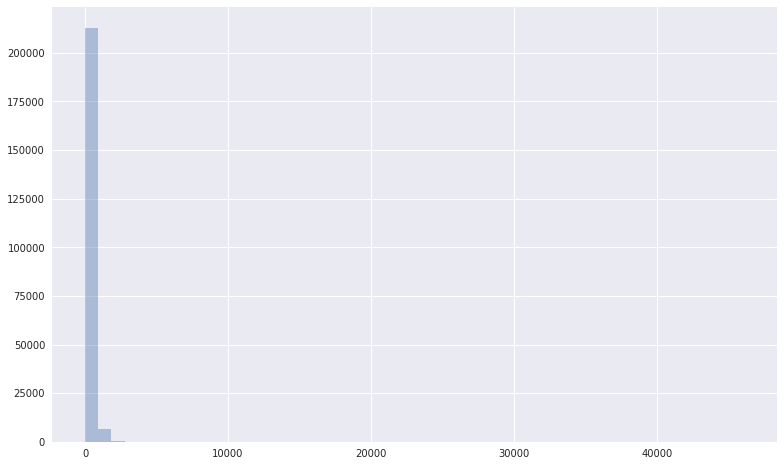

In [164]:
%matplotlib inline

plt.subplots(figsize=(13,8))
sns.set(color_codes=True)
x = np.asarray([len(t) for t in Hufa_texts])
sns.distplot(x, kde=False);

,Valores
Menor o igual a 2000 (%),0.999350
Mayor a 2000 (%),0.000650
Media,238.435162
Std,303.209978


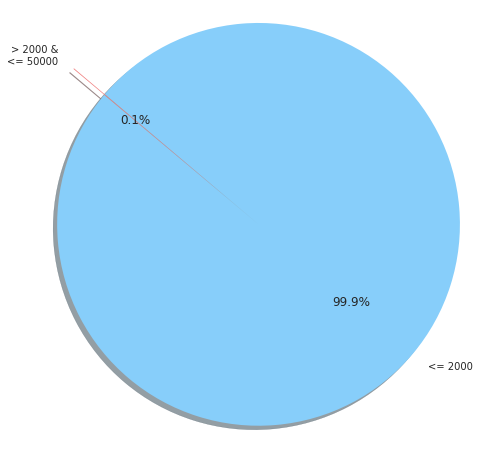

In [165]:
a = x[np.where(x <= 2000)].shape[0]/x.shape[0]
b = x[(x > 2000) & (x <= 50000)].shape[0]/x.shape[0]

# Data to plot
labels = '<= 2000', '> 2000 &\n<= 50000'
sizes = [a, b]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0.1)  # explode 1st slice
 
# Plot
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')

d = ['Menor o igual a 2000 (%)', 'Mayor a 2000 (%)', 'Media', 'Std']
v = [a, b, x.mean(), x.std()]

pd.DataFrame(v, columns=['Valores'], index=d)

## Datos empleados para Wiki WE

In [26]:
Xtrain = [Wiki_review_to_wordlist(text, stemmer) for text in df_train.text]
Xdev = [Wiki_review_to_wordlist(text, stemmer) for text in df_dev.text]
Xtest = [Wiki_review_to_wordlist(text, stemmer) for text in df_test.text]
Wiki_texts = Xtrain+Xdev+Xtest

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



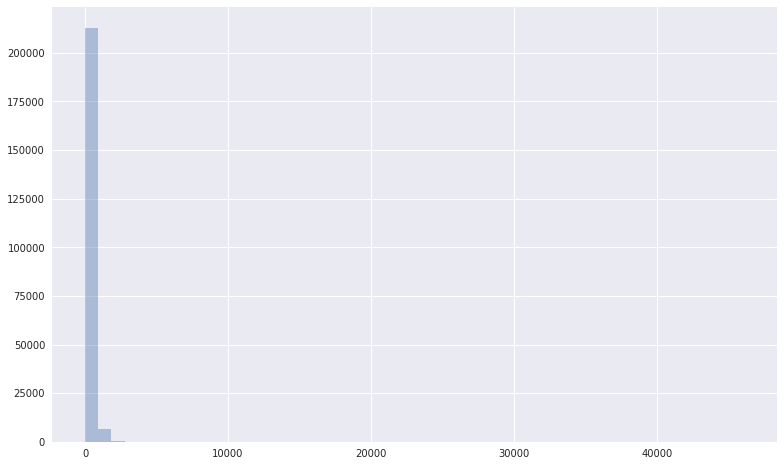

In [166]:
%matplotlib inline

plt.subplots(figsize=(13,8))
sns.set(color_codes=True)
x = np.asarray([len(t) for t in Wiki_texts])
sns.distplot(x, kde=False);

,Valores
Menor o igual a 2000 (%),0.999350
Mayor a 2000 (%),0.000650
Media,238.275373
Std,303.052837


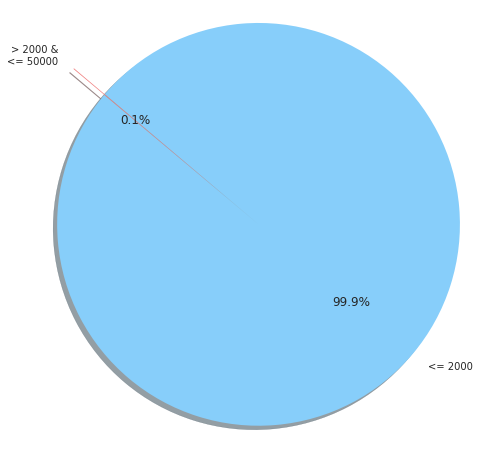

In [167]:
a = x[np.where(x <= 2000)].shape[0]/x.shape[0]
b = x[(x > 2000) & (x <= 50000)].shape[0]/x.shape[0]

# Data to plot
labels = '<= 2000', '> 2000 &\n<= 50000'
sizes = [a, b]
colors = ['lightskyblue', 'lightcoral']
explode = (0.1, 0.1)  # explode 1st slice
 
# Plot
plt.subplots(figsize=(8,8))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.axis('equal')
#plt.show()

d = ['Menor o igual a 2000 (%)', 'Mayor a 2000 (%)', 'Media', 'Std']
v = [a, b, x.mean(), x.std()]

pd.DataFrame(v, columns=['Valores'], index=d)